# Modèle de Probabilité de Défaut (PD) avec Régression Logistique

In [1]:
# Import biblio

In [2]:
import numpy as np
import pandas as pd

In [5]:
independientes_evaluacion = pd.read_csv('C:/Users/IDEAPAD5/Desktop/Python Udemy/Model PD/datos_guardados_independientes_evaluacion.csv', index_col = 0)

In [7]:
dependiente_evaluacion = pd.read_csv('C:/Users/IDEAPAD5/Desktop/Python Udemy/Model PD/datos_guardados_dependiente_evaluacion.csv', index_col = 0)


In [8]:
independientes_entreno = pd.read_csv('C:/Users/IDEAPAD5/Desktop/Python Udemy/Model PD/datos_guardados_independientes_entreno.csv', index_col = 0)

In [15]:
dependiente_entreno = pd.read_csv('C:/Users/IDEAPAD5/Desktop/Python Udemy/Model PD/datos_guardados_dependiente_entreno.csv', index_col = 0)

In [10]:
# Exploration des données

In [11]:
independientes_entreno.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti_19.9-20.8,dti_20.8-23.2,dti_23.2-35.2,dti>35.2,mths_since_last_record_faltantes,mths_since_last_record_0-3,mths_since_last_record_3-21,mths_since_last_record_21-31,mths_since_last_record_31-85,mths_since_last_record>85
344531,344531,21200994,23503865,10000,10000,10000.0,36 months,11.67,330.57,B,...,0,0,0,0,1,0,0,0,0,0
328300,328300,23904923,26277659,11000,11000,11000.0,36 months,12.49,367.94,B,...,0,0,0,0,1,0,0,0,0,0
299890,299890,28603222,31126369,10950,10950,10950.0,60 months,18.99,283.99,E,...,0,1,0,0,0,0,0,0,1,0
439226,439226,12325666,14317820,35000,35000,35000.0,36 months,15.31,1218.61,C,...,0,0,1,0,1,0,0,0,0,0
167889,167889,3294813,4066999,8000,8000,7975.0,36 months,12.12,266.18,B,...,0,0,0,0,1,0,0,0,0,0


In [16]:
dependiente_entreno.head()

,buenos_malos
344531,1
328300,1
299890,1
439226,1
167889,0


In [17]:
independientes_entreno.shape

(419656, 286)

In [18]:
dependiente_entreno.shape

(419656, 1)

In [19]:
independientes_evaluacion.shape

(46629, 286)

In [20]:
dependiente_evaluacion.shape

(46629, 1)

In [21]:
# Sélectionnons les variables indépendantes que nous utiliserons dans notre modèle.

In [22]:
independientes_entreno_modelo = independientes_entreno.loc[:, ['Casa_MORTGAGE',
'Casa_RENT_ANY_OTHER_NONE',
'Casa_OWN',
'Direccion_ND_NE_IA_NV',
'Direccion_FL',
'Direccion_AL_HI_MO_NM',
'Direccion_CA',
'Direccion_NC_ID_NJ',
'Direccion_NY',
'Direccion_KY_LA_MD',
'Direccion_MI_AR_AZ_VA_OK_DE_OH',
'Direccion_MN_PA_UT_MA_RI_WA_TN_IN',
'Direccion_CT_IL',
'Direccion_TX',
'Direccion_NH_AK_MT_MS_WY_WV_DC_ME',
'Verificacion_Not Verified',
'Verificacion_Source Verified',
'Verificacion_Verified',
'Proposito_ed_pyme_enerren_mudanza',
'Proposito_casa_otros_boda_salud_vacacion',
'Proposito_comprasgrandes_mejoras_carro',
'Proposito_debt_consolidation',
'Proposito_credit_card',
'Grados_A',
'Grados_B',
'Grados_C',
'Grados_D',
'Grados_E',
'Grados_F_G',
'Estado_Lista_f',
'Estado_Lista_w',
'plazo_36',
'plazo_60',
'antiguedad_menosde1',
'antiguedad_1a4',
'antiguedad_5a6',
'antiguedad_7',
'antiguedad_8a9',
'antiguedad_10+',
'meses_credito<87',
'meses_credito_87_89',
'meses_credito_89_90',
'meses_credito_90_98',
'meses_credito_98_101',
'meses_credito_101_110',
'meses_credito_110_126',
'meses_credito_126_155',
'meses_credito_155+',
'ingresos_anuales<20K',
'ingresos_anuales20K-30K',
'ingresos_anuales30K-40K',
'ingresos_anuales40K-50K',
'ingresos_anuales50K-60K',
'ingresos_anuales60K-70K',
'ingresos_anuales70K-80K',
'ingresos_anuales80K-90K',
'ingresos_anuales90K-100K',
'ingresos_anuales100K-126K',
'ingresos_anuales126K-152K',
'ingresos_anuales152K-227K',
'ingresos_anuales>227K',
'meses_desde_fallo_null',
'meses_desde_fallo_0-4',
'meses_desde_fallo_4-30',
'meses_desde_fallo_30-60',
'meses_desde_fallo_60-83',
'meses_desde_fallo_83+',
'morosidad_2anios_0',
'morosidad_2anios_1-4',
'morosidad_2anios_>=5',
'total_acc_<=6',
'total_acc_6-22',
'total_acc_22-50',
'total_acc_>50',
'dti<=3.2',
'dti_3.2-8.8',
'dti_8.8-10.4',
'dti_10.4-13.6',
'dti_13.6-16.0',
'dti_16.0-16.7',
'dti_16.7-19.9',
'dti_19.9-20.8',
'dti_20.8-23.2',
'dti_23.2-35.2',
'dti>35.2',
'mths_since_last_record_faltantes',
'mths_since_last_record_0-3',
'mths_since_last_record_3-21',
'mths_since_last_record_21-31',
'mths_since_last_record_31-85',
'mths_since_last_record>85']]

In [483]:
# Générons un dataframe avec les catégories de référence.

In [23]:
categorias_referencia = ['Casa_RENT_ANY_OTHER_NONE',
'Direccion_ND_NE_IA_NV',
'Verificacion_Verified',
'Proposito_ed_pyme_enerren_mudanza',
'Grados_F_G',
'Estado_Lista_f',
'plazo_60',
'antiguedad_menosde1',
'meses_credito_155+',
'ingresos_anuales<20K',
'meses_desde_fallo_83+',
'morosidad_2anios_>=5',
'total_acc_<=6',
'dti_23.2-35.2',
'mths_since_last_record_0-3']

In [485]:
#Enfin, générons le dataframe avec lequel nous ajusterons le modèle, c'est-à-dire 
#retirons la catégorie de référence pour chacun des ensembles de variables fictives.

In [24]:
independiente_entreno = independientes_entreno_modelo.drop(categorias_referencia, axis = 1)

In [25]:
independiente_entreno.head()

,Casa_MORTGAGE,Casa_OWN,Direccion_FL,Direccion_AL_HI_MO_NM,Direccion_CA,Direccion_NC_ID_NJ,Direccion_NY,Direccion_KY_LA_MD,Direccion_MI_AR_AZ_VA_OK_DE_OH,Direccion_MN_PA_UT_MA_RI_WA_TN_IN,...,dti_16.0-16.7,dti_16.7-19.9,dti_19.9-20.8,dti_20.8-23.2,dti>35.2,mths_since_last_record_faltantes,mths_since_last_record_3-21,mths_since_last_record_21-31,mths_since_last_record_31-85,mths_since_last_record>85
344531,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
328300,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
299890,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
439226,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
167889,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


# Estimation du Modèle de Probabilité de Défaut

In [26]:
# Importons le modèle de régression logistique.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [28]:
# Créons un objet de régression logistique à partir de la classe LogisticRegression.

In [29]:
# regresion = LogisticRegression()  # va contenir l'intercept et les coefficients de la régression

In [55]:
regresion = LogisticRegression(solver='newton-cg')  # solver='newton-cg' hace que nuestro modelo converga, evita el error ConvergenceWarning:

In [56]:
# Voyons tous les résultats (coefficients)

In [57]:
pd.options.display.max_rows = None

In [58]:
# Nous estimons le modèle en appliquant la méthode fit à l'objet de régression avec les variables
# indépendantes et dépendantes en tant que paramètres
# fit estime le modèle et sauvegarde les résultats dans l'objet de régression. Pour convertir de df à array .values.ravel()
# regresion.fit(variables_independientes_entrenamiento, variable_dependiente_entrenamiento.values.ravel())

In [59]:
regresion.fit(independiente_entreno, dependiente_entreno.values.ravel())

LogisticRegression(solver='newton-cg')

In [61]:
# Pour obtenir l'intercept de la régression

In [62]:
regresion.intercept_

array([-0.76185989])

In [63]:
# Le méthode .coef_ nous donne les coefficients dans l'ordre du dataframe des variables indépendantes.

In [64]:
regresion.coef_

array([[ 0.09928318,  0.08326017, -0.20774375, -0.15624847, -0.13755956,
        -0.14041358, -0.11685257, -0.12350589, -0.07955274, -0.07562235,
         0.04617939,  0.05656821,  0.28085473,  0.09547648, -0.00518066,
         0.39002955,  0.45597356,  0.40049189,  0.53159442,  2.00789053,
         1.32357042,  0.87675559,  0.55347262,  0.2592499 ,  0.06358482,
         0.03483883,  0.05445688,  0.03783859,  0.02564303,  0.00273019,
         0.09790182,  1.81366324,  1.48687054,  1.30527661,  0.99330569,
         0.69440974,  0.39447583,  0.07264291,  0.23205195, -0.11119003,
        -0.05099183,  0.02022245,  0.12720578,  0.16768695,  0.27377485,
         0.33555075,  0.40002367,  0.48026373,  0.54870401,  0.56478929,
         0.60314653,  0.30560026,  0.29584531,  0.38964762,  0.40678849,
         0.35039215,  0.08964278,  0.08464655, -0.0629663 , -0.12549971,
        -0.13010805,  0.26215739,  0.30131099,  0.2269338 ,  0.18768667,
         0.1831951 ,  0.13675437,  0.10600716,  0.0

In [65]:
# Nous créons un format standard similaire à ce que nous obtiendrions avec un logiciel d'économétrie tel que SPSS ou similaire
# Nous créons un tableau avec les noms des variables indépendantes

In [66]:
nombres_var_independientes = independiente_entreno.columns.values
nombres_var_independientes

array(['Casa_MORTGAGE', 'Casa_OWN', 'Direccion_FL',
       'Direccion_AL_HI_MO_NM', 'Direccion_CA', 'Direccion_NC_ID_NJ',
       'Direccion_NY', 'Direccion_KY_LA_MD',
       'Direccion_MI_AR_AZ_VA_OK_DE_OH',
       'Direccion_MN_PA_UT_MA_RI_WA_TN_IN', 'Direccion_CT_IL',
       'Direccion_TX', 'Direccion_NH_AK_MT_MS_WY_WV_DC_ME',
       'Verificacion_Not Verified', 'Verificacion_Source Verified',
       'Proposito_casa_otros_boda_salud_vacacion',
       'Proposito_comprasgrandes_mejoras_carro',
       'Proposito_debt_consolidation', 'Proposito_credit_card',
       'Grados_A', 'Grados_B', 'Grados_C', 'Grados_D', 'Grados_E',
       'Estado_Lista_w', 'plazo_36', 'antiguedad_1a4', 'antiguedad_5a6',
       'antiguedad_7', 'antiguedad_8a9', 'antiguedad_10+',
       'meses_credito<87', 'meses_credito_87_89', 'meses_credito_89_90',
       'meses_credito_90_98', 'meses_credito_98_101',
       'meses_credito_101_110', 'meses_credito_110_126',
       'meses_credito_126_155', 'ingresos_anuales20K-3

In [67]:
# Tableau récapitulatif avec les résultats de notre régression logistique
# Nous créons une colonne avec les noms des variables indépendantes

In [68]:
tabla_resultados = pd.DataFrame(columns = ['Variable Independiente'], data = nombres_var_independientes)

In [69]:
# Deuxième colonne avec les coefficients pour chaque variable indépendante
# Transpose pour transposer (verticalement) les coefficients

In [70]:
tabla_resultados ['Coeficientes'] = np.transpose(regresion.coef_)

In [71]:
# Nous plaçons l'intercept dans la première ligne de notre tableau

In [72]:
tabla_resultados.index = tabla_resultados.index + 1
tabla_resultados

,Variable Independiente,Coeficientes
1,Casa_MORTGAGE,0.099283
2,Casa_OWN,0.083260
3,Direccion_FL,-0.207744
4,Direccion_AL_HI_MO_NM,-0.156248
5,Direccion_CA,-0.137560
6,Direccion_NC_ID_NJ,-0.140414
7,Direccion_NY,-0.116853
8,Direccion_KY_LA_MD,-0.123506
9,Direccion_MI_AR_AZ_VA_OK_DE_OH,-0.079553
10,Direccion_MN_PA_UT_MA_RI_WA_TN_IN,-0.075622


In [73]:
# Maintenant, remplissons la ligne 1 avec le nom de l'intercept et sa valeur respective (qui est restée à la fin)

In [74]:
tabla_resultados.loc[0] = ['Intercepto', regresion.intercept_[0]]
tabla_resultados

,Variable Independiente,Coeficientes
1,Casa_MORTGAGE,0.099283
2,Casa_OWN,0.083260
3,Direccion_FL,-0.207744
4,Direccion_AL_HI_MO_NM,-0.156248
5,Direccion_CA,-0.137560
6,Direccion_NC_ID_NJ,-0.140414
7,Direccion_NY,-0.116853
8,Direccion_KY_LA_MD,-0.123506
9,Direccion_MI_AR_AZ_VA_OK_DE_OH,-0.079553
10,Direccion_MN_PA_UT_MA_RI_WA_TN_IN,-0.075622


In [75]:
# Trier le tableau par numéro d'index

In [76]:
tabla_resultados = tabla_resultados.sort_index()
tabla_resultados

,Variable Independiente,Coeficientes
0,Intercepto,-0.761860
1,Casa_MORTGAGE,0.099283
2,Casa_OWN,0.083260
3,Direccion_FL,-0.207744
4,Direccion_AL_HI_MO_NM,-0.156248
5,Direccion_CA,-0.137560
6,Direccion_NC_ID_NJ,-0.140414
7,Direccion_NY,-0.116853
8,Direccion_KY_LA_MD,-0.123506
9,Direccion_MI_AR_AZ_VA_OK_DE_OH,-0.079553


# Estimando p-values para la Regresión Logística

In [77]:
# Les régressions logistiques en Python est qu'elles n'estiment pas les
# valeurs p multivariable de manière directe. Cependant, le code suivant a déjà résolu ce problème :
# https://gist.github.com/rspeare/77061e6e317896be29c6de9a85db301d

In [78]:
from sklearn import linear_model
import numpy as np
import scipy.stats as stat

class RegresionLogistica_con_p_values:
    """
    Wrapper Class for Logistic Regression which has the usual sklearn instance 
    in an attribute self.model, and pvalues, z scores and estimated 
    errors for each coefficient in 
    
    self.z_scores
    self.p_values
    self.sigma_estimates
    
    as well as the negative hessian of the log Likelihood (Fisher information)
    
    self.F_ij
    """
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs, solver = 'newton-cg')#,**args) #usamos el mismo solver linea 30

    def fit(self,X,y):
        self.model.fit(X,y)
        #### Get p-values for the fitted model ####
        denom = (2.0*(1.0+np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X/denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0]/sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x))*2 for x in z_scores] ### two tailed test for p-values
        
        self.z_scores = z_scores
        self.p_values = p_values
        self.sigma_estimates = sigma_estimates
        self.F_ij = F_ij

In [79]:
# Nous allons créer un objet de la classe RegresionLogistica_con_p_values

In [80]:
reglogistica_p_values = RegresionLogistica_con_p_values() 

In [81]:
# Une exigence de la fonction que nous avons définie est que la variable dépendante soit un tableau
# au lieu d'un dataframe, ce n'est pas un problème et pour éviter une erreur, nous utilisons .values.ravel()

In [82]:
reglogistica_p_values.fit(independiente_entreno, dependiente_entreno.values.ravel())

In [84]:
independiente_entreno.corr() #matriz de correlation.

,Casa_MORTGAGE,Casa_OWN,Direccion_FL,Direccion_AL_HI_MO_NM,Direccion_CA,Direccion_NC_ID_NJ,Direccion_NY,Direccion_KY_LA_MD,Direccion_MI_AR_AZ_VA_OK_DE_OH,Direccion_MN_PA_UT_MA_RI_WA_TN_IN,...,dti_16.0-16.7,dti_16.7-19.9,dti_19.9-20.8,dti_20.8-23.2,dti>35.2,mths_since_last_record_faltantes,mths_since_last_record_3-21,mths_since_last_record_21-31,mths_since_last_record_31-85,mths_since_last_record>85
Casa_MORTGAGE,1.000000,-0.316638,-0.008751,0.037809,-0.137074,0.000585,-0.119382,0.028450,0.064833,0.040091,...,0.006780,0.014412,0.004283,-0.001197,-0.013931,0.003207,0.005091,-0.000796,-0.014011,0.012344
Casa_OWN,-0.316638,1.000000,0.013075,0.011641,-0.041781,0.003938,0.012143,0.012426,0.004977,-0.008133,...,-0.006030,-0.006422,0.000150,0.002826,0.018359,-0.003668,0.004111,0.002372,0.003332,-0.000241
Direccion_FL,-0.008751,0.013075,1.000000,-0.054846,-0.114913,-0.071681,-0.083039,-0.058295,-0.104386,-0.107951,...,0.000142,0.001612,0.002341,0.002744,0.001770,0.009441,-0.007535,-0.009379,-0.002361,-0.007732
Direccion_AL_HI_MO_NM,0.037809,0.011641,-0.054846,1.000000,-0.086432,-0.053915,-0.062458,-0.043847,-0.078514,-0.081196,...,-0.000812,0.003016,0.003349,0.008487,0.008183,-0.004468,-0.003477,-0.000967,-0.000975,0.008619
Direccion_CA,-0.137074,-0.041781,-0.114913,-0.086432,1.000000,-0.112962,-0.130862,-0.091868,-0.164503,-0.170121,...,-0.001196,-0.008250,-0.009245,-0.016621,-0.012144,0.016581,-0.005972,-0.002496,0.002819,-0.023724
Direccion_NC_ID_NJ,0.000585,0.003938,-0.071681,-0.053915,-0.112962,1.000000,-0.081629,-0.057306,-0.102614,-0.106119,...,0.001381,-0.001348,-0.003882,-0.005188,-0.000167,0.010196,-0.001657,-0.002895,-0.003844,-0.011050
Direccion_NY,-0.119382,0.012143,-0.083039,-0.062458,-0.130862,-0.081629,1.000000,-0.066386,-0.118874,-0.122934,...,-0.000688,-0.014714,-0.003690,-0.014369,-0.004947,0.007928,0.018177,0.010492,-0.007893,-0.012931
Direccion_KY_LA_MD,0.028450,0.012426,-0.058295,-0.043847,-0.091868,-0.057306,-0.066386,1.000000,-0.083452,-0.086303,...,0.002335,0.001587,0.002693,0.002682,-0.000538,0.003040,-0.000286,0.003649,-0.001995,-0.003477
Direccion_MI_AR_AZ_VA_OK_DE_OH,0.064833,0.004977,-0.104386,-0.078514,-0.164503,-0.102614,-0.118874,-0.083452,1.000000,-0.154537,...,-0.003645,0.004438,0.005317,0.012344,0.003497,-0.032746,0.006908,0.007264,0.018053,0.025881
Direccion_MN_PA_UT_MA_RI_WA_TN_IN,0.040091,-0.008133,-0.107951,-0.081196,-0.170121,-0.106119,-0.122934,-0.086303,-0.154537,1.000000,...,0.000482,0.005669,0.001547,0.003393,0.000012,-0.012247,-0.002570,0.000771,0.004591,0.013886


In [86]:
# Une fois que nous avons généré la régression logistique, nous pouvons ajouter les valeurs p à notre tableau de résultats
# Voyons les valeurs p

In [87]:
p_values = reglogistica_p_values.p_values #p-values de las variables
p_values

[4.77282793842003e-15,
 3.9893984650824146e-05,
 3.2283190790214957e-16,
 3.662117494573817e-07,
 1.4530342983220621e-10,
 9.72246210126704e-08,
 2.0393338085599344e-06,
 3.99350799188039e-05,
 0.0003239710901581531,
 0.0005777907268581233,
 0.1162135314325683,
 0.03205995962146847,
 1.8453188193492042e-10,
 5.168320947089321e-11,
 0.7035361524940518,
 2.1272965033491847e-33,
 5.4704589244364896e-42,
 2.166857395310302e-44,
 1.413566015323589e-66,
 0.0,
 0.0,
 1.485550240838152e-290,
 2.3401599396957834e-116,
 3.2528123282229273e-24,
 2.516953053227981e-06,
 0.012846157982132,
 0.0003132900482188978,
 0.09691919099228748,
 0.30060864713422,
 0.9186651593264036,
 1.5215246731125824e-11,
 3.439488022764563e-148,
 2.8932473423735515e-110,
 3.7296502755453023e-76,
 2.330429540602936e-55,
 7.073298157013933e-27,
 4.034352939301394e-10,
 0.2522739352494888,
 0.0003271199148322525,
 0.00403158509840865,
 0.14929488136683317,
 0.5615543666617577,
 0.0003135179764434612,
 2.8063474150813904e-06

In [88]:
# L'intercept n'a jamais une valeur p, mais nous avons besoin d'une valeur NaN pour avoir une colonne de la même dimension

In [89]:
p_values = np.append(np.nan, np.array(p_values))

In [90]:
p_values

array([            nan, 4.77282794e-015, 3.98939847e-005, 3.22831908e-016,
       3.66211749e-007, 1.45303430e-010, 9.72246210e-008, 2.03933381e-006,
       3.99350799e-005, 3.23971090e-004, 5.77790727e-004, 1.16213531e-001,
       3.20599596e-002, 1.84531882e-010, 5.16832095e-011, 7.03536152e-001,
       2.12729650e-033, 5.47045892e-042, 2.16685740e-044, 1.41356602e-066,
       0.00000000e+000, 0.00000000e+000, 1.48555024e-290, 2.34015994e-116,
       3.25281233e-024, 2.51695305e-006, 1.28461580e-002, 3.13290048e-004,
       9.69191910e-002, 3.00608647e-001, 9.18665159e-001, 1.52152467e-011,
       3.43948802e-148, 2.89324734e-110, 3.72965028e-076, 2.33042954e-055,
       7.07329816e-027, 4.03435294e-010, 2.52273935e-001, 3.27119915e-004,
       4.03158510e-003, 1.49294881e-001, 5.61554367e-001, 3.13517976e-004,
       2.80634742e-006, 1.47258649e-013, 4.49861373e-018, 1.77164652e-022,
       1.68146077e-035, 8.68227240e-032, 1.67668789e-029, 1.07204193e-017,
       3.46290903e-003, 3

In [91]:
tabla_resultados

,Variable Independiente,Coeficientes
0,Intercepto,-0.761860
1,Casa_MORTGAGE,0.099283
2,Casa_OWN,0.083260
3,Direccion_FL,-0.207744
4,Direccion_AL_HI_MO_NM,-0.156248
5,Direccion_CA,-0.137560
6,Direccion_NC_ID_NJ,-0.140414
7,Direccion_NY,-0.116853
8,Direccion_KY_LA_MD,-0.123506
9,Direccion_MI_AR_AZ_VA_OK_DE_OH,-0.079553


In [93]:
tabla_resultados['p_values'] = p_values

In [94]:
tabla_resultados

,Variable Independiente,Coeficientes,p_values
0,Intercepto,-0.761860,NaN
1,Casa_MORTGAGE,0.099283,4.772828e-15
2,Casa_OWN,0.083260,3.989398e-05
3,Direccion_FL,-0.207744,3.228319e-16
4,Direccion_AL_HI_MO_NM,-0.156248,3.662117e-07
5,Direccion_CA,-0.137560,1.453034e-10
6,Direccion_NC_ID_NJ,-0.140414,9.722462e-08
7,Direccion_NY,-0.116853,2.039334e-06
8,Direccion_KY_LA_MD,-0.123506,3.993508e-05
9,Direccion_MI_AR_AZ_VA_OK_DE_OH,-0.079553,3.239711e-04


# Sélection de la variable avec les valeurs p
H0 : Non significatif
H1 : Significatif

RDD : Si la valeur p < alpha (0,05) : elle est significative et H0 est rejetée

Une petite valeur p signifie que la probabilité que les résultats obtenus soient dus au hasard est faible.

In [95]:
# Nous allons retirer du modèle les variables indicatrices liées à la variable d'incidents de retard
# au cours des 2 dernières années, car en tant que membre du même groupe (morosidad_2anios_0, morosidad_2anios_1-4),
# aucune n'est statistiquement significative selon sa valeur p.

In [96]:
# Supprimons les variables indicatrices liées à morosidad_2anios du dataframe des variables indépendantes original

In [97]:
independientes_entreno_modelo = independientes_entreno.loc[:, ['Casa_MORTGAGE',
'Casa_RENT_ANY_OTHER_NONE',
'Casa_OWN',
'Direccion_ND_NE_IA_NV',
'Direccion_FL',
'Direccion_AL_HI_MO_NM',
'Direccion_CA',
'Direccion_NC_ID_NJ',
'Direccion_NY',
'Direccion_KY_LA_MD',
'Direccion_MI_AR_AZ_VA_OK_DE_OH',
'Direccion_MN_PA_UT_MA_RI_WA_TN_IN',
'Direccion_CT_IL',
'Direccion_TX',
'Direccion_NH_AK_MT_MS_WY_WV_DC_ME',
'Verificacion_Not Verified',
'Verificacion_Source Verified',
'Verificacion_Verified',
'Proposito_ed_pyme_enerren_mudanza',
'Proposito_casa_otros_boda_salud_vacacion',
'Proposito_comprasgrandes_mejoras_carro',
'Proposito_debt_consolidation',
'Proposito_credit_card',
'Grados_A',
'Grados_B',
'Grados_C',
'Grados_D',
'Grados_E',
'Grados_F_G',
'Estado_Lista_f',
'Estado_Lista_w',
'plazo_36',
'plazo_60',
'antiguedad_menosde1',
'antiguedad_1a4',
'antiguedad_5a6',
'antiguedad_7',
'antiguedad_8a9',
'antiguedad_10+',
'meses_credito<87',
'meses_credito_87_89',
'meses_credito_89_90',
'meses_credito_90_98',
'meses_credito_98_101',
'meses_credito_101_110',
'meses_credito_110_126',
'meses_credito_126_155',
'meses_credito_155+',
'ingresos_anuales<20K',
'ingresos_anuales20K-30K',
'ingresos_anuales30K-40K',
'ingresos_anuales40K-50K',
'ingresos_anuales50K-60K',
'ingresos_anuales60K-70K',
'ingresos_anuales70K-80K',
'ingresos_anuales80K-90K',
'ingresos_anuales90K-100K',
'ingresos_anuales100K-126K',
'ingresos_anuales126K-152K',
'ingresos_anuales152K-227K',
'ingresos_anuales>227K',
'meses_desde_fallo_null',
'meses_desde_fallo_0-4',
'meses_desde_fallo_4-30',
'meses_desde_fallo_30-60',
'meses_desde_fallo_60-83',
'meses_desde_fallo_83+',
#'morosidad_2anios_0',
#'morosidad_2anios_1-4',
#'morosidad_2anios_>=5',
'total_acc_<=6',
'total_acc_6-22',
'total_acc_22-50',
'total_acc_>50',
'dti<=3.2',
'dti_3.2-8.8',
'dti_8.8-10.4',
'dti_10.4-13.6',
'dti_13.6-16.0',
'dti_16.0-16.7',
'dti_16.7-19.9',
'dti_19.9-20.8',
'dti_20.8-23.2',
'dti_23.2-35.2',
'dti>35.2',
'mths_since_last_record_faltantes',
'mths_since_last_record_0-3',
'mths_since_last_record_3-21',
'mths_since_last_record_21-31',
'mths_since_last_record_31-85',
'mths_since_last_record>85']]

In [98]:
# Faisons de même avec les catégories de référence

In [99]:
categorias_referencia = ['Casa_RENT_ANY_OTHER_NONE',
'Direccion_ND_NE_IA_NV',
'Verificacion_Verified',
'Proposito_ed_pyme_enerren_mudanza',
'Grados_F_G',
'Estado_Lista_f',
'plazo_60',
'antiguedad_menosde1',
'meses_credito_155+',
'ingresos_anuales<20K',
'meses_desde_fallo_83+',
# 'morosidad_2anios_>=5',
'total_acc_<=6',
'dti_23.2-35.2',
'mths_since_last_record_0-3']

In [100]:
# Supprimer les variables de référence des variables indépendantes du modèle

In [101]:
independiente_entreno = independientes_entreno_modelo.drop(categorias_referencia, axis = 1)

In [102]:
independiente_entreno.shape

(419656, 74)

In [538]:
# Définissons les objets regresion2 et regresion2_p_values

In [103]:
regresion2 = regresion = LogisticRegression(solver = 'newton-cg')
regresion2_p_values = RegresionLogistica_con_p_values() # Le solveur est déjà défini dans la classe RegresionLogistica_con_p_values

In [104]:
# Ajustons le modèle

In [105]:
regresion2.fit(independiente_entreno, dependiente_entreno.values.ravel())
regresion2_p_values.fit(independiente_entreno, dependiente_entreno.values.ravel())

In [106]:
# tableau

In [107]:
nombres_var_independientes = independiente_entreno.columns.values
tabla_resultados = pd.DataFrame(columns = ['Variable Independiente'], data = nombres_var_independientes)
tabla_resultados['Coeficientes'] = np.transpose(regresion2.coef_)
tabla_resultados.index = tabla_resultados.index + 1
tabla_resultados.loc[0] = ['Intercepto', regresion2.intercept_[0]]
tabla_resultados = tabla_resultados.sort_index()
p_values = regresion2_p_values.p_values
p_values = np.append(np.nan, np.array(p_values))
tabla_resultados['p_values'] = p_values

In [108]:
tabla_resultados

,Variable Independiente,Coeficientes,p_values
0,Intercepto,-0.667983,NaN
1,Casa_MORTGAGE,0.099254,4.826906e-15
2,Casa_OWN,0.083285,3.966229e-05
3,Direccion_FL,-0.207613,3.308666e-16
4,Direccion_AL_HI_MO_NM,-0.156218,3.667267e-07
5,Direccion_CA,-0.137447,1.484883e-10
6,Direccion_NC_ID_NJ,-0.140432,9.642841e-08
7,Direccion_NY,-0.116864,2.028481e-06
8,Direccion_KY_LA_MD,-0.123486,3.996527e-05
9,Direccion_MI_AR_AZ_VA_OK_DE_OH,-0.079535,3.239793e-04


# Validation du Modèle PD

In [110]:
# Commençons par sélectionner les variables de notre modèle (elles doivent être les mêmes que celles de l'ensemble d'entraînement)

In [111]:
independientes_evaluacion_modelo = independientes_evaluacion.loc[:, ['Casa_MORTGAGE',
'Casa_RENT_ANY_OTHER_NONE',
'Casa_OWN',
'Direccion_ND_NE_IA_NV',
'Direccion_FL',
'Direccion_AL_HI_MO_NM',
'Direccion_CA',
'Direccion_NC_ID_NJ',
'Direccion_NY',
'Direccion_KY_LA_MD',
'Direccion_MI_AR_AZ_VA_OK_DE_OH',
'Direccion_MN_PA_UT_MA_RI_WA_TN_IN',
'Direccion_CT_IL',
'Direccion_TX',
'Direccion_NH_AK_MT_MS_WY_WV_DC_ME',
'Verificacion_Not Verified',
'Verificacion_Source Verified',
'Verificacion_Verified',
'Proposito_ed_pyme_enerren_mudanza',
'Proposito_casa_otros_boda_salud_vacacion',
'Proposito_comprasgrandes_mejoras_carro',
'Proposito_debt_consolidation',
'Proposito_credit_card',
'Grados_A',
'Grados_B',
'Grados_C',
'Grados_D',
'Grados_E',
'Grados_F_G',
'Estado_Lista_f',
'Estado_Lista_w',
'plazo_36',
'plazo_60',
'antiguedad_menosde1',
'antiguedad_1a4',
'antiguedad_5a6',
'antiguedad_7',
'antiguedad_8a9',
'antiguedad_10+',
'meses_credito<87',
'meses_credito_87_89',
'meses_credito_89_90',
'meses_credito_90_98',
'meses_credito_98_101',
'meses_credito_101_110',
'meses_credito_110_126',
'meses_credito_126_155',
'meses_credito_155+',
'ingresos_anuales<20K',
'ingresos_anuales20K-30K',
'ingresos_anuales30K-40K',
'ingresos_anuales40K-50K',
'ingresos_anuales50K-60K',
'ingresos_anuales60K-70K',
'ingresos_anuales70K-80K',
'ingresos_anuales80K-90K',
'ingresos_anuales90K-100K',
'ingresos_anuales100K-126K',
'ingresos_anuales126K-152K',
'ingresos_anuales152K-227K',
'ingresos_anuales>227K',
'meses_desde_fallo_null',
'meses_desde_fallo_0-4',
'meses_desde_fallo_4-30',
'meses_desde_fallo_30-60',
'meses_desde_fallo_60-83',
'meses_desde_fallo_83+',
#'morosidad_2anios_0',
#'morosidad_2anios_1-4',
#'morosidad_2anios_>=5',
'total_acc_<=6',
'total_acc_6-22',
'total_acc_22-50',
'total_acc_>50',
'dti<=3.2',
'dti_3.2-8.8',
'dti_8.8-10.4',
'dti_10.4-13.6',
'dti_13.6-16.0',
'dti_16.0-16.7',
'dti_16.7-19.9',
'dti_19.9-20.8',
'dti_20.8-23.2',
'dti_23.2-35.2',
'dti>35.2',
'mths_since_last_record_faltantes',
'mths_since_last_record_0-3',
'mths_since_last_record_3-21',
'mths_since_last_record_21-31',
'mths_since_last_record_31-85',
'mths_since_last_record>85']]

In [112]:
categorias_referencia = ['Casa_RENT_ANY_OTHER_NONE',
'Direccion_ND_NE_IA_NV',
'Verificacion_Verified',
'Proposito_ed_pyme_enerren_mudanza',
'Grados_F_G',
'Estado_Lista_f',
'plazo_60',
'antiguedad_menosde1',
'meses_credito_155+',
'ingresos_anuales<20K',
'meses_desde_fallo_83+',
# 'morosidad_2anios_>=5',
'total_acc_<=6',
'dti_23.2-35.2',
'mths_since_last_record_0-3']

In [113]:
# Supprimons les variables de référence de la base de données d'indicateurs de l'évaluation

In [114]:
independiente_evaluacion = independientes_evaluacion_modelo.drop(categorias_referencia, axis = 1)

In [115]:
independiente_evaluacion.shape

(46629, 74)

In [116]:
independiente_entreno.shape

(419656, 74)

In [117]:
# Nous avons maintenant une base d'évaluation avec les mêmes 74 variables indicatrices que celle de l'ensemble d'entraînement.
# Nous pouvons maintenant appliquer le modèle PD que nous avons déjà sur la base d'évaluation

In [118]:
prediccion_y = regresion2.predict(independiente_evaluacion)

In [119]:
# Comment fonctionne le modèle :
# 1. Les valeurs des variables indicatrices (1-0) sont multipliées par leur coefficient respectif (Beta)
# Le résultat est le logarithme des probabilités (odds) d'être un bon client (ne pas faire défaut)
# 2. L'exponentielle (e) du résultat ci-dessus est estimée pour obtenir la probabilité d'être un bon client
# 3. Enfin, un seuil est déterminé pour catégoriser les probabilités d'être bon ou mauvais
# Le seuil par défaut est de 0,5. Mais si les coûts d'être bon ou mauvais sont connus, il est possible de
# déterminer le seuil qui optimise la fonction d'utilité.

In [120]:
prediccion_y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [121]:
# Les prédictions précédentes ont été catégorisées avec un seuil de 0,5.
# Comme nous souhaitons effectuer cette catégorisation, nous avons besoin des probabilités.

In [122]:
probabilidad_y = regresion2.predict_proba(independiente_evaluacion)

In [124]:
probabilidad_y # les probabilités au lieu des catégories

array([[0.09044552, 0.90955448],
       [0.03819745, 0.96180255],
       [0.0632368 , 0.9367632 ],
       ...,
       [0.06364772, 0.93635228],
       [0.11792685, 0.88207315],
       [0.01646695, 0.98353305]])

In [125]:
# Nous avons obtenu un tableau de tableaux. Pour chacune des 46 629 observations, nous avons deux valeurs.
# La probabilité d'être un mauvais client (PD) et la probabilité d'être un bon client (1-PD).
# Générons un tableau avec la probabilité d'être un bon client.

In [126]:
probabilidad_bueno = probabilidad_y[:,1]

In [127]:
probabilidad_bueno

array([0.90955448, 0.96180255, 0.9367632 , ..., 0.93635228, 0.88207315,
       0.98353305])

In [128]:
# Maintenant, générons un df avec deux colonnes :
# 1. Avec les valeurs réelles de bon-mauvais de la base d'évaluation
# 2. Avec les probabilités que nous venons d'estimer
# Nous ne pouvons pas simplement concaténer un df avec un tableau ayant des indices différents.
# Nous devons d'abord extraire les valeurs réelles et supprimer les indices.

In [129]:
valores_reales = dependiente_evaluacion

In [130]:
valores_reales.head()

,buenos_malos
89223,1
158835,0
108909,1
270155,1
23971,1


In [131]:
valores_reales.reset_index(drop = True, inplace = True)

In [132]:
valores_reales.head()

,buenos_malos
0,1
1,0
2,1
3,1
4,1


In [133]:
# concat

In [134]:
df_prediccion = pd.concat([valores_reales, pd.DataFrame(probabilidad_bueno)], axis = 1)

In [135]:
df_prediccion.head()

,buenos_malos,0
0,1,0.909554
1,0,0.961803
2,1,0.936763
3,1,0.886823
4,1,0.854169


In [137]:
df_prediccion.columns = ['Real', 'Proba_Prediccion']

In [138]:
df_prediccion.head()

,Real,Proba_Prediccion
0,1,0.909554
1,0,0.961803
2,1,0.936763
3,1,0.886823
4,1,0.854169


In [139]:
# Mettons les indices de la base d'évaluation pour savoir qui est chaque client

In [140]:
df_prediccion.index = independiente_evaluacion.index

In [141]:
df_prediccion.head()

,Real,Proba_Prediccion
89223,1,0.909554
158835,0,0.961803
108909,1,0.936763
270155,1,0.886823
23971,1,0.854169


# Matrice de confusion

In [205]:
# Définissons la prédiction à partir des probabilités et d'un seuil.

In [143]:
punto_de_corte = 0.5

In [144]:
df_prediccion['Prediccion'] = np.where(df_prediccion['Proba_Prediccion'] > punto_de_corte, 1, 0)

In [145]:
df_prediccion.head()

,Real,Proba_Prediccion,Prediccion
89223,1,0.909554,1
158835,0,0.961803,1
108909,1,0.936763,1
270155,1,0.886823,1
23971,1,0.854169,1


In [146]:
#Generons la matrice de confusion avec la méthode .crosstab de pandas. 
#Paramètres : (valeurs réelles, prédictions, nom des lignes, nom des colonnes)

In [147]:
pd.crosstab(df_prediccion['Real'], df_prediccion['Prediccion'], 
            rownames = ['Valores Reales'], colnames = ['Predicciones'])

Predicciones,0,1
Valores Reales,,
0,1,4381
1,1,42246


In [148]:
#Nous pourrions également estimer la matrice de confusion en pourcentages. 
#Divisons chacune des valeurs par le total des observations (nombre de lignes).

In [149]:
pd.crosstab(df_prediccion['Real'], df_prediccion['Prediccion'], 
            rownames = ['Valores Reales'], colnames = ['Predicciones']) / df_prediccion.shape[0]

Predicciones,0,1
Valores Reales,,
0,0.000021,0.093954
1,0.000021,0.906003


In [150]:
#Métrique d'exactitude (Accuracy)
#(Vrais positifs + Vrais négatifs) / Total

In [151]:
VP = (pd.crosstab(df_prediccion['Real'], df_prediccion['Prediccion'], 
                  rownames = ['Valores Reales'], colnames = ['Predicciones']) / df_prediccion.shape[0]).iloc[1,1]
VP

0.9060027021810462

In [152]:
VN = (pd.crosstab(df_prediccion['Real'], df_prediccion['Prediccion'], 
                  rownames = ['Valores Reales'], colnames = ['Predicciones']) / df_prediccion.shape[0]).iloc[0,0]
VN

2.1445881318492783e-05

In [153]:
Exactitud = VP + VN 

In [154]:
Exactitud

0.9060241480623646

Le modèle a une précision relativement élevée de 90 % et fait un excellent travail pour prédire les clients bons. Cependant, il a une mauvaise performance pour prédire les clients mauvais. Cela s'explique par le fait que la majorité des observations dans la base sont des clients bons. Par conséquent, le modèle avec un seuil de coupure de 0,5 aura tendance à prédire que la plupart sont des clients bons, générant ainsi un grand nombre de faux positifs. Imaginons maintenant que nous utilisons ce modèle et ce seuil de coupure pour accorder des crédits : nous accorderions ainsi du crédit à de nombreux clients mauvais. Pour cette raison, il est nécessaire d'établir un seuil de coupure plus conservateur, disons 0,85. Recalculons la matrice de confusion avec un seuil de coupure de 0,85. Avec ce nouveau seuil de coupure, nous réduirions considérablement le nombre de défauts, mais aussi le nombre de demandes approuvées.

# ROC y AUC

In [160]:
from sklearn.metrics import roc_curve, roc_auc_score

In [161]:
#Définissons la courbe ROC. Nous avons besoin de deux arguments :
#Les valeurs réelles
#Les probabilités de notre modèle de prédiction

In [162]:
roc_curve(df_prediccion['Real'], df_prediccion['Proba_Prediccion'])

(array([0.        , 0.        , 0.        , ..., 0.99977179, 0.99977179,
        1.        ]),
 array([0.00000000e+00, 2.36703198e-05, 1.68059270e-03, ...,
        9.99905319e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.99566605, 0.99349452, ..., 0.53623792, 0.48965534,
        0.470524  ]))

En résultat, nous obtenons trois tableaux :
1 tableau. Taux de faux positifs
2 tableau. Taux de vrais positifs
3 tableau. Les points de coupure
Extrayons chacun de ces tableaux dans des variables :

In [168]:
falsos_positivos, verdaderos_positivos, puntos_de_corte = roc_curve(df_prediccion['Real'], df_prediccion['Proba_Prediccion'])

In [169]:
# graph ROC

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

Text(0.5, 1.0, 'Curva ROC')

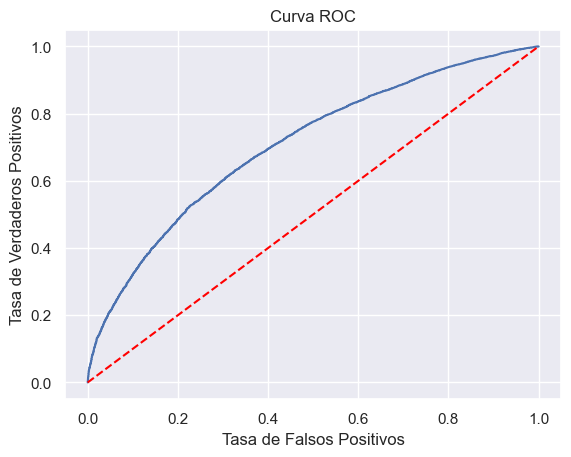

In [167]:
plt.plot(falsos_positivos, verdaderos_positivos) # Nous définissons les données du graphique, avec des valeurs de x fictives et des valeurs de y réelles.
plt.plot(falsos_positivos, falsos_positivos, linestyle = '--', color = 'red') # Benchmark (Predictor 50/50) la diagonale
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')

In [170]:
# la métrique AUC (aire sous la courbe) nous sert à évaluer la qualité du modèle."

In [171]:
AUC = roc_auc_score(df_prediccion['Real'], df_prediccion['Proba_Prediccion'])

In [172]:
AUC

0.7069446363103981

# Coefficients de Gini y Kolgomorov-Smirnov
Gini : Mesure de l'inégalité entre les emprunteurs bons et mauvais. Et pourcentage cumulé des mauvais. Axe des X : Cumul total. Plus grande est l'aire sous la courbe, meilleur est le modèle.

Kolmogorov-Smirnov : Mesure à quel point le modèle sépare bien les bons et les mauvais. Plus ils sont séparés, meilleur est le modèle.

In [173]:
# Trier le dataframe par les probabilités par ordre croissant.

In [174]:
df_prediccion = df_prediccion.sort_values('Proba_Prediccion')

In [175]:
df_prediccion.head()

,Real,Proba_Prediccion,Prediccion,Monto
42319,0,0.470524,0,8400
18781,1,0.489655,0,1200
42113,1,0.513947,1,6625
42481,1,0.520316,1,1000
42433,1,0.521947,1,3000


In [405]:
df_prediccion.tail() 

,Real,Proba_Prediccion,Prediccion
245306,1,0.994991,1
255463,1,0.995022,1
261086,1,0.995187,1
232642,1,0.995230,1
256952,1,0.995666,1


In [406]:
#Pour calculer la proportion cumulative, nous devons réindexer le dataframe selon 
#l'ordre croissant des probabilités que nous avons. Nous voulons que l'observation 
#avec la plus faible probabilité ait un indice de 0, la suivante 1, et ainsi de suite.


In [176]:
df_prediccion = df_prediccion.reset_index()

In [177]:
df_prediccion.head()

,index,Real,Proba_Prediccion,Prediccion,Monto
0,42319,0,0.470524,0,8400
1,18781,1,0.489655,0,1200
2,42113,1,0.513947,1,6625
3,42481,1,0.520316,1,1000
4,42433,1,0.521947,1,3000


In [178]:
#Remarquons que, en écrivant par-dessus l'indice sans utiliser drop = True
#une colonne index a été générée automatiquement, préservant ainsi les indices d'origine pour identifier chaque client.

Pour créer les graphiques de performance de notre modèle, nous avons besoin de:
1. Le pourcentage cumulatif du total des clients
2. Le pourcentage cumulatif des clients bons
3. Le pourcentage cumulatif des clients mauvais
Avant d'estimer le pourcentage, calculons le nombre (n) correspondant.

In [180]:
# Cumulatif du total des clients : somme des indices.

In [181]:
df_prediccion['Número Acumulado de Clientes'] = df_prediccion.index + 1

In [182]:
#Cumulatif du total des clients bons : comme 'Real' pour les bons-mauvais est une variable binaire
#prenant la valeur de 1 lorsque le client est bon, tout ce que nous avons à faire est de réaliser
#la somme cumulative de cette variable en utilisant la méthode .cumsum.

In [183]:
df_prediccion['Número Acumulado de Clientes Buenos'] = df_prediccion['Real'].cumsum()

In [184]:
#Cumulatif du total des clients mauvais : Nous ne pouvons pas simplement sommer les zéros 
#cumulés (ce serait toujours zéro). Cependant, pour chaque ligne, nous connaissons le nombre 
#total de clients cumulés et le total de clients bons cumulés. Le cumulatif des clients mauvais 
#devrait être la différence entre ces deux nombres.

In [185]:
df_prediccion['Número Acumulado de Clientes Malos'] = df_prediccion['Número Acumulado de Clientes'] - df_prediccion['Número Acumulado de Clientes Buenos']

In [186]:
df_prediccion.head()

,index,Real,Proba_Prediccion,Prediccion,Monto,Número Acumulado de Clientes,Número Acumulado de Clientes Buenos,Número Acumulado de Clientes Malos
0,42319,0,0.470524,0,8400,1,0,1
1,18781,1,0.489655,0,1200,2,1,1
2,42113,1,0.513947,1,6625,3,2,1
3,42481,1,0.520316,1,1000,4,3,1
4,42433,1,0.521947,1,3000,5,4,1


In [187]:
df_prediccion.tail()

,index,Real,Proba_Prediccion,Prediccion,Monto,Número Acumulado de Clientes,Número Acumulado de Clientes Buenos,Número Acumulado de Clientes Malos
46624,245306,1,0.994991,1,15000,46625,42243,4382
46625,255463,1,0.995022,1,20000,46626,42244,4382
46626,261086,1,0.995187,1,17000,46627,42245,4382
46627,232642,1,0.995230,1,28000,46628,42246,4382
46628,256952,1,0.995666,1,18000,46629,42247,4382


In [188]:
#Une fois que nous avons estimé le nombre cumulatif, nous devons estimer la proportion cumulée. 
#Pour le % Cumulatif de Clients, nous divisons le Nombre Cumulatif de Clients par le Total de Clients.

In [189]:
df_prediccion['% Acumulado Clientes'] = df_prediccion['Número Acumulado de Clientes'] / df_prediccion.shape[0] #0 total de filas

In [190]:
#Pour le % Cumulatif de Clients Bons, nous divisons le Nombre Cumulatif de Clients 
#Bons par le Total de Clients Bons.

In [191]:
df_prediccion['% Acumulado Clientes Buenos'] = df_prediccion['Número Acumulado de Clientes Buenos'] / df_prediccion['Real'].sum()

In [192]:
#Pour le % Cumulatif de Clients Mauvais, nous divisons le Nombre Cumulatif de Clients Mauvais par le Total de Clients Mauvais.

In [193]:
df_prediccion['% Acumulado Clientes Malos'] = df_prediccion['Número Acumulado de Clientes Malos'] / (df_prediccion.shape[0] - df_prediccion['Real'].sum())

In [194]:
df_prediccion.head()

,index,Real,Proba_Prediccion,Prediccion,Monto,Número Acumulado de Clientes,Número Acumulado de Clientes Buenos,Número Acumulado de Clientes Malos,% Acumulado Clientes,% Acumulado Clientes Buenos,% Acumulado Clientes Malos
0,42319,0,0.470524,0,8400,1,0,1,0.000021,0.000000,0.000228
1,18781,1,0.489655,0,1200,2,1,1,0.000043,0.000024,0.000228
2,42113,1,0.513947,1,6625,3,2,1,0.000064,0.000047,0.000228
3,42481,1,0.520316,1,1000,4,3,1,0.000086,0.000071,0.000228
4,42433,1,0.521947,1,3000,5,4,1,0.000107,0.000095,0.000228


In [195]:
# Coeff de Gini y Kolgomorov-Smirnov.

In [196]:
#Nous avons calculé les pourcentages cumulés, ce qui est tout ce dont nous avons besoin
#pour créer les graphiques et estimer les coefficients de Gini et de K-S. 
#Commençons par le graphique de Gini, qui représente le % Cumulatif de Mauvais (axe Y) en fonction du % Cumulatif du total (axe X).

Text(0.5, 1.0, 'Curva de Gini')

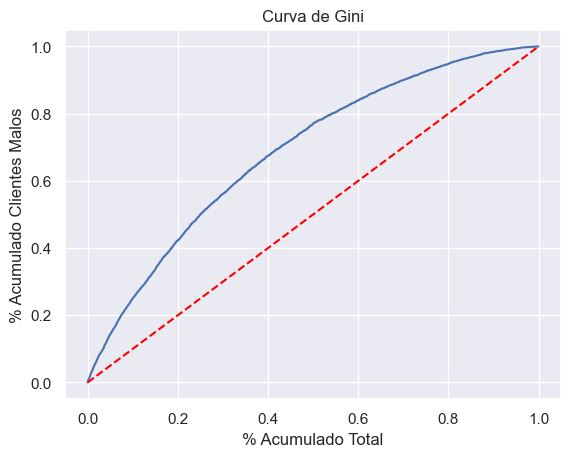

In [197]:
plt.plot(df_prediccion['% Acumulado Clientes'], df_prediccion['% Acumulado Clientes Malos'])
plt.plot(df_prediccion['% Acumulado Clientes'], df_prediccion['% Acumulado Clientes'], linestyle = '--', color = 'red') # Benchmark de predicción aleatoria 50-50
plt.xlabel('% Acumulado Total')
plt.ylabel('% Acumulado Clientes Malos')
plt.title('Curva de Gini')

In [198]:
#Il y a des similitudes entre le graphique de Gini et l'AUC. 
#En fait, le coefficient de Gini peut être exprimé comme :
# GINI = AUC*2-1

In [199]:
Coef_Gini = AUC*2-1
Coef_Gini

0.4138892726207961

In [ ]:
#Un indice de Gini de 0 indiquerait que les emprunteurs à risque sont répartis de manière équitable
#sur l'ensemble de la gamme de notation ; en d'autres termes, le score de crédit n'a pas attribué 
#de scores plus bas à davantage d'emprunteurs en défaut, comme le ferait un indicateur avec un pouvoir 
#prédictif plus fort. Un indice de coefficient de 100 % indiquerait que tous les emprunteurs en défaut 
#se sont vu attribuer avec succès les scores les plus bas possibles. Les coefficients de Gini de 45 % 
#ou plus sont considérés comme des indicateurs d'une forte précision dans l'évaluation du crédit.
#Un coefficient de 41,4 % est jugé satisfaisant.

In [454]:
# graph K-S
#Rappelons que la statistique de K-S mesure la distance (sur l'axe des Y) 
#entre deux fonctions de distribution cumulée. Plus la distance est grande,
#meilleure est la caractéristique qui les distingue. Dans notre cas spécifique, les fonctions sont :

#% Cumulatif de Clients Bons en fonction de la Probabilité d'être bon (Proba_Prediccion)
#% Cumulatif de Clients Mauvais en fonction de la Probabilité d'être bon
#Si le modèle était parfait, la distance maximale serait égale à 1. Pour un modèle de prédiction aléatoire, la distance tend vers zéro.

Text(0.5, 1.0, 'Kolgomorov-Smirnov')

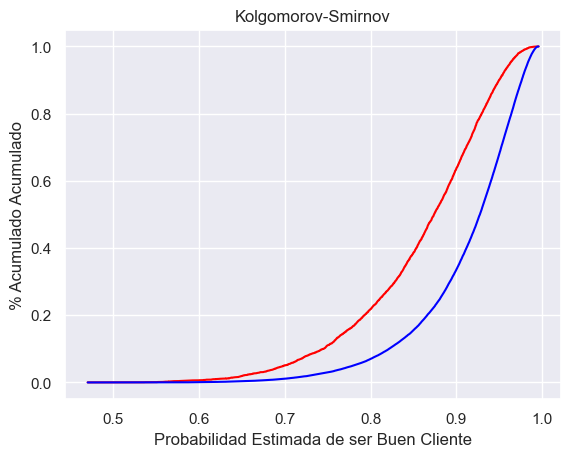

In [200]:
plt.plot(df_prediccion['Proba_Prediccion'], df_prediccion['% Acumulado Clientes Malos'], color = 'red')
plt.plot(df_prediccion['Proba_Prediccion'], df_prediccion['% Acumulado Clientes Buenos'], color = 'blue')
plt.xlabel('Probabilidad Estimada de ser Buen Cliente')
plt.ylabel('% Acumulado Acumulado')
plt.title('Kolgomorov-Smirnov')

In [201]:
#Le coefficient K-S est la distance (verticale) maximale entre la courbe rouge et la courbe bleue.
#Nous pouvons le calculer avec les données du dataframe en prenant le maximum de la différence entre
#le % cumulatif des mauvais et le % cumulatif des bons :

In [202]:
Coef_KS = max(df_prediccion['% Acumulado Clientes Malos']-df_prediccion['% Acumulado Clientes Buenos'])

In [203]:
Coef_KS

0.3045755171087095

In [204]:
#Il ne s'approche pas de 1, mais il est significativement plus élevé que zéro. 
#Les deux distributions cumulatives sont suffisamment éloignées. 
#Nous pouvons affirmer que le modèle a un pouvoir de prédiction satisfaisant.

In [463]:
independientes_evaluacion.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti_19.9-20.8,dti_20.8-23.2,dti_23.2-35.2,dti>35.2,mths_since_last_record_faltantes,mths_since_last_record_0-3,mths_since_last_record_3-21,mths_since_last_record_21-31,mths_since_last_record_31-85,mths_since_last_record>85
89223,89223,7073644,8735123,9600,9600,9600.0,36 months,15.10,333.26,C,...,0,0,1,0,1,0,0,0,0,0
158835,158835,3640390,4592970,14000,14000,14000.0,36 months,7.62,436.26,A,...,0,1,0,0,1,0,0,0,0,0
108909,108909,6527485,8079529,16750,16750,16750.0,36 months,8.90,531.87,A,...,0,0,1,0,1,0,0,0,0,0
270155,270155,32419070,35032306,19750,19750,19750.0,60 months,20.20,525.46,E,...,0,0,1,0,1,0,0,0,0,0
23971,23971,606796,778433,15000,9475,9450.0,60 months,8.88,196.14,B,...,1,0,0,0,1,0,0,0,0,0
